# Project: No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>The dataset selected collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. There are a number of factors on which this might depend on. The following are a few questions to begin with:

>How does age influence the trend of no-show?

>Which neighbourhood has the highest average no-show rate?

>Does scholarship have an effect on the trend?

>Does the gender of the patient have an impact on the no-show values?


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [53]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This shows that there are no missing values.

In [55]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [56]:
df.duplicated().sum()

0

No duplicate rows are present.

The columns 'PatientId' and 'AppointmentID' don't have an influence on whether or not people show up for their appointment. Therefore they are dropped.

In [57]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [58]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Since there are no missing values or duplicates, the data seems to be clean.

<a id='eda'></a>
## Exploratory Data Analysis

These are general observations of all the variables.

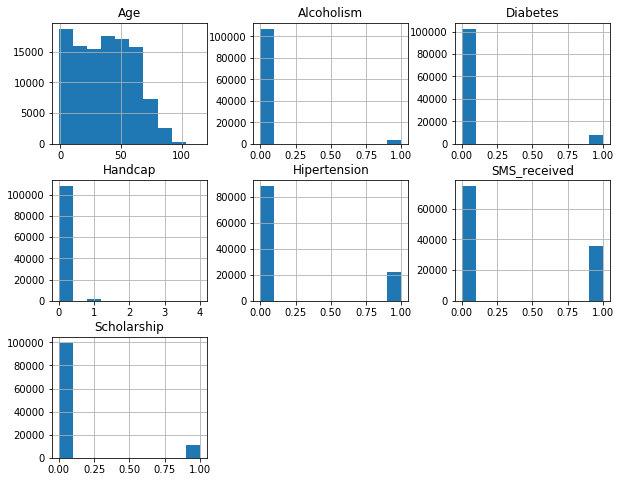

In [59]:
df.hist(figsize=(10,8));

The 'No-show' column has 'Yes' and 'No' values which are changed to '1' and '0' respectively for the purpose of calculations.

In [60]:
mapping={'Yes':1,'No':0}

The replacement is done as follows:

In [61]:
df.replace({'No-show':mapping},inplace=True)

Masks are created as follows:

In [62]:
noshow=df['No-show']==True

In [63]:
show=df['No-show']==False

## __How does age influence the trend of no-show?__

In [64]:
df.groupby('Age')['No-show'].value_counts()

Age   No-show
-1    0             1
 0    0          2900
      1           639
 1    0          1858
      1           415
 2    0          1366
      1           252
 3    0          1236
      1           277
 4    0          1017
      1           282
 5    0          1169
      1           320
 6    0          1205
      1           316
 7    0          1126
      1           301
 8    0          1106
      1           318
 9    0          1008
      1           364
 10   0           970
      1           304
 11   0           948
      1           247
 12   0           820
      1           272
 13   0           800
      1           303
 14   0           802
                 ... 
 86   1            42
 87   0           157
      1            27
 88   0           114
      1            12
 89   0           144
      1            29
 90   0            86
      1            23
 91   0            53
      1            13
 92   0            66
      1            20
 93   0           

In [65]:
df=df[df.Age!=-1]

Negative values of Age are dropped. 

In [66]:
df['Age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
56     1635
38     1629
59     1624
2      1618
50     1613
57     1603
36     1580
51     1567
19     1545
39     1536
37     1533
54     1530
34     1526
33     1524
30     1521
6      1521
3      1513
17     1509
32     1505
5      1489
44     1487
18     1487
58     1469
46     1460
45     1453
       ... 
72      615
74      602
76      571
75      544
78      541
77      527
80      511
81      434
82      392
79      390
84      311
83      280
85      275
86      260
87      184
89      173
88      126
90      109
92       86
91       66
93       53
94       33
95       24
96       17
97       11
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

The following is a visualization of how 'No-show' depends on age:

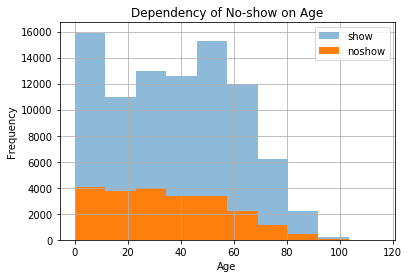

In [67]:
df.Age[show].hist(alpha=0.5,label='show')
df.Age[noshow].hist(label='noshow')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Dependency of No-show on Age')
plt.legend();

The histogram shows that people over the age of 60 have lesser no shows.

## __Which neighbourhood has the highest average no-show rate?__

Mean 'Neighbourhood' values are analyzed to observe trends.

In [68]:
df.groupby('Neighbourhood')['No-show'].mean()

Neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
BELA VISTA             0.201363
BENTO FERREIRA         0.224942
BOA VISTA              0.185897
BONFIM                 0.198341
CARATOÍRA              0.230409
CENTRO                 0.210858
COMDUSA                0.180645
CONQUISTA              0.188457
CONSOLAÇÃO             0.172238
CRUZAMENTO             0.217454
DA PENHA               0.193505
DE LOURDES             0.154098
DO CABRAL              0.157143
DO MOSCOSO             0.222760
DO QUADRO              0.164900
ENSEADA DO SUÁ         0.221277
ESTRELINHA             0.197026
FONTE GRANDE           0.218475
FORTE SÃO JOÃO         0.183166
FRADINHOS              0.186047
GOIABEIRAS             0.195714
GRANDE VITÓRIA         0.202614
GURIGICA               0.225966
HORTO                  0.240000
ILHA DAS CAIEIRAS      0.219421
                         .

Mean values of no-show based on the neighbourhood are calculated.

In [69]:
mask=df.groupby('Neighbourhood')['No-show'].mean()

The plot below shows the dependency of 'No-show' on Neighbourhood:

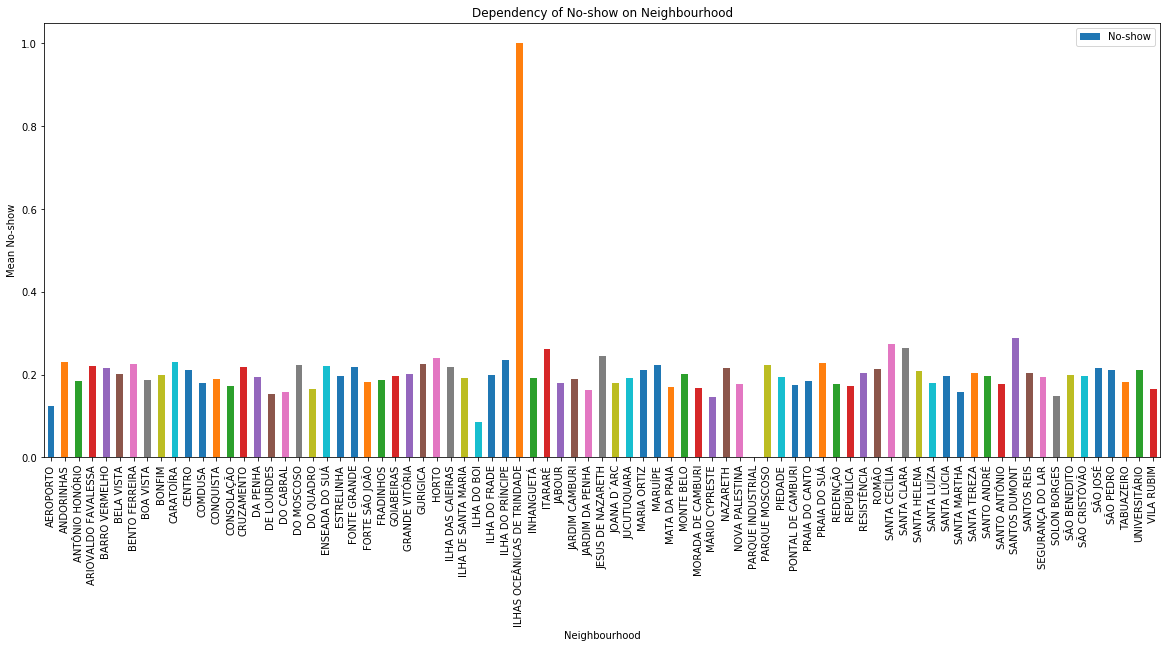

In [70]:
mask.plot(kind='bar',figsize=(20,8))
plt.xlabel('Neighbourhood')
plt.ylabel('Mean No-show')
plt.title('Dependency of No-show on Neighbourhood')
plt.legend();

'No-show' values vary based on the neighbourhood. 

'Ilhas Oceanias De Trindade' has the highest average no-show rate.

## __Does scholarship have an effect on the trend?__

In [71]:
df.groupby('Scholarship')['No-show'].mean()

Scholarship
0    0.198074
1    0.237363
Name: No-show, dtype: float64

A bar chart shows the dependency of 'No-show' on 'Scholarship'

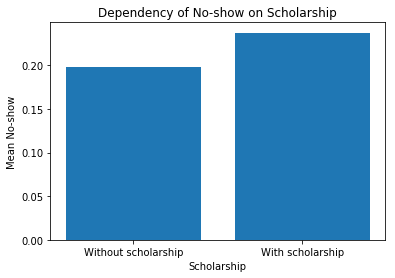

In [72]:
labels=[1,2]
labelss=['Without scholarship','With scholarship']
plt.bar(labels,df.groupby('Scholarship')['No-show'].mean(),tick_label=labelss)
plt.title('Dependency of No-show on Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Mean No-show');

## __Does the gender of the patient have an impact on the no-show values?__

The number of no-shows and shows for each gender are analyzed.

In [73]:
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: No-show, dtype: int64

A bar chart shows the relation between gender and no-show.

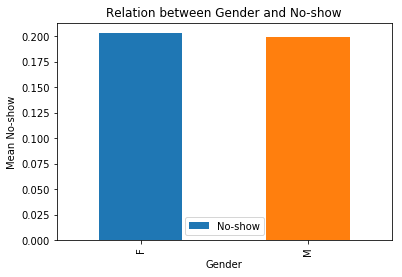

In [74]:
df.groupby('Gender')['No-show'].mean().plot(kind='bar');
plt.xlabel('Gender')
plt.ylabel('Mean No-show')
plt.title('Relation between Gender and No-show')
plt.legend();

<a id='conclusions'></a>
## Conclusions

__The following conclusions can be drawn from the above analysis:__

>Age, Neighbourhood and Scholarship are three factors that influence the no-show rate.

>'No-show' values are lower among people aged above 60 as compared to the other age groups.

>'No-show' values vary depending on the neighbourhood of the hospital.

>'Ilhas Oceanias De Trindade' seems to have a high no-show rate.

>People with scholarships as in those enrolled in the Brasilian welfare program have a higher average no-show rate.

>Gender does not seem to have an effect on the number of patients not showing up for their scheduled appointments.

# __Limitations__:
>Age 0 can be categorized as infants below the age of 1 but data on infants of different ages isn't present.

>Only a few medical conditions like diabetes, hipertension and alcoholism are taken into consideration. There may be other influencing factors as well.

>'No-show' values might also depend on a person's economic status which hasn't beem considered.

>The condition of a hospital matters as well. 

>This dataset is not an effective representation of the entire population.
 

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0